## Clase 7

# Pandas y matplotlib




* df.sum()  # Suma de valores por columna.
* df.mean()  # Media por columna.
* df.median()  # Mediana por columna.
* df.min(), df.max()  # Valores mínimos y máximos.
* df.count()  # Conteo de valores no nulos.
* df.std(), df.var()  # Desviación estándar y varianza.


* df['columna'].unique()  # Valores únicos en una columna.
* df['columna'].value_counts()  # Conteo de valores únicos.
* df.corr()  # Correlación entre columnas numéricas.


groupby
merge 
concat
aply map
pivoting y reshaping


operaciones para series de tiempo  
* diff
* percent change
* lag
* window    

In [9]:
import pandas as pd
clientes = pd.read_csv('C:/Users/Flori/Desktop/Omniscient Platforms/BAPRO/curso-bapro/clase 6/clientes_banco.csv')  # Adjust the path to the correct location of the file

In [10]:
clientes.head()

,ID_cliente,Nombre,Apellido,Edad,Provincia,Ocupacion,Saldo_cuenta,Limite_credito,Tiene_tarjeta,Producto_principal,Fecha_alta,Nivel_satisfaccion
0,1,Diego,Fernández,67,Tucumán,Desempleado,NaN,123027.71,True,Tarjeta de crédito,2017-01-23,6.0
1,2,Lucía,García,77,Santa Fe,Empresario,112856.92,182542.98,True,Caja de ahorro,2017-01-16,8.0
2,3,Ana,Sánchez,60,Salta,Desempleado,175554.01,NaN,True,Plazo fijo,2016-11-18,5.0
3,4,Carlos,Díaz,54,Santa Fe,Empleado,-6681.79,142505.72,False,Cuenta corriente,2016-12-23,2.0
4,5,Diego,Gómez,32,Salta,NaN,22934.41,171855.97,False,Caja de ahorro,2019-04-16,4.0


In [ ]:
clientes.describe() ##no incluye nulos

,ID_cliente,Edad,Saldo_cuenta,Limite_credito,Nivel_satisfaccion
count,2002.000000,2002.000000,1802.000000,1802.000000,1802.000000
mean,999.508492,48.798701,100352.541509,148602.857714,5.428968
std,578.057304,17.945053,50243.793968,39806.992139,2.874326
min,1.000000,18.000000,-84831.100000,12968.190000,1.000000
25%,499.250000,33.000000,66174.720000,121025.575000,3.000000
50%,999.500000,49.000000,101729.960000,149290.360000,5.000000
75%,1499.750000,64.000000,134244.632500,174799.130000,8.000000
max,2000.000000,79.000000,270709.350000,278350.740000,10.000000


In [ ]:
clientes[['Edad','Saldo_cuenta','Limite_credito','Nivel_satisfaccion']].corr() #correlacion entre columnas numericas

,Edad,Saldo_cuenta,Limite_credito,Nivel_satisfaccion
Edad,1.000000,0.036376,-0.015897,0.001801
Saldo_cuenta,0.036376,1.000000,0.000536,-0.012904
Limite_credito,-0.015897,0.000536,1.000000,0.025088
Nivel_satisfaccion,0.001801,-0.012904,0.025088,1.000000


In [11]:
seguros = pd.read_csv('seguros_clientes.csv')

In [12]:
seguros.head()

,ID_cliente,Tiene_seguro_vida,Monto_seguro
0,1969,False,46746.40
1,1229,True,53464.36
2,190,False,53215.87
3,244,False,62665.24
4,1835,False,51342.13


Merge

In [32]:
# Hacer el merge usando ID_cliente como clave
clientes_con_seguros = pd.merge(clientes, seguros, on='ID_cliente', how='left')  ##inner 

In [33]:
clientes_con_seguros.head()

,ID_cliente,Nombre,Apellido,Edad,Provincia,Ocupacion,Saldo_cuenta,Limite_credito,Tiene_tarjeta,Producto_principal,Fecha_alta,Nivel_satisfaccion,Tiene_seguro_vida,Monto_seguro
0,1,Diego,Fernández,67,Tucumán,Desempleado,NaN,123027.71,True,Tarjeta de crédito,2017-01-23,6.0,True,43635.63
1,2,Lucía,García,77,Santa Fe,Empresario,112856.92,182542.98,True,Caja de ahorro,2017-01-16,8.0,False,52961.47
2,3,Ana,Sánchez,60,Salta,Desempleado,175554.01,NaN,True,Plazo fijo,2016-11-18,5.0,True,58113.03
3,4,Carlos,Díaz,54,Santa Fe,Empleado,-6681.79,142505.72,False,Cuenta corriente,2016-12-23,2.0,True,59539.81
4,5,Diego,Gómez,32,Salta,NaN,22934.41,171855.97,False,Caja de ahorro,2019-04-16,4.0,NaN,NaN


Diferencias de merge y join:
* merge se usa para uniones mas complejas, para combinar DF con multiples columnas o con nombres diferentes 
* join es mas imple y orientada al indice

In [13]:
clientes_con_seguros_join = clientes.join(seguros.set_index('ID_cliente'), on='ID_cliente', how='left')

In [14]:
# Primero establecer ID_cliente como índice en ambos DataFrames
seguros_indexed = seguros.set_index('ID_cliente')
clientes_indexed = clientes.set_index('ID_cliente')
clientes_con_segurosjoin = clientes_indexed.join(seguros_indexed, how='left')

In [ ]:
# Unir por múltiples columnas con nombres idénticos en ambos DataFrames
# resultado = pd.merge(
#     df1, 
#     df2,
#     on=['columna1', 'columna2', 'columna3'],
#     how='inner'
# )

Group by

In [7]:
# 1. GroupBy básico - promedio de saldo por provincia
saldo_por_provincia = clientes.groupby('Provincia')['Saldo_cuenta'].mean().sort_values(ascending=False)
print("Promedio de saldo por provincia:")
print(saldo_por_provincia)

Promedio de saldo por provincia:
Provincia
Tucumán         104506.464818
Salta           103605.667348
Chubut          103030.789571
Neuquén         102247.346638
Santa Fe        101932.650000
Córdoba          99043.556800
Buenos Aires     94529.905134
Mendoza          94147.240769
Name: Saldo_cuenta, dtype: float64


In [ ]:
# 2. GroupBy con múltiples columnas - Contar clientes por provincia y producto
clientes_por_prov_prod = clientes.groupby(['Provincia', 'Producto_principal']).size().unstack() 
# size Cuenta cuántos registros (clientes) hay en cada grupo combinado. Esto te dice, por ejemplo, "cuántos clientes hay en Santa Fe que tienen Caja de ahorro".
# unstack(): Transforma el resultado en una tabla de dos dimensiones (DataFrame),
print("\nCantidad de clientes por provincia y producto:")
clientes_por_prov_prod.head(8)


Cantidad de clientes por provincia y producto:


Producto_principal,Caja de ahorro,Cuenta corriente,Plazo fijo,Préstamo personal,Tarjeta de crédito
Provincia,,,,,
Buenos Aires,51,56,47,47,44
Chubut,49,56,51,40,48
Córdoba,67,58,54,44,56
Mendoza,45,52,45,46,49
Neuquén,50,52,47,56,51
Salta,57,57,54,36,49
Santa Fe,43,54,39,54,45
Tucumán,45,52,67,49,40


In [ ]:
# 3. Múltiples funciones de agregación - estadísticas de saldo por ocupación
stats_por_ocupacion = clientes.groupby('Ocupacion')['Saldo_cuenta'].agg(['count', 'min', 'max', 'mean']) #Aplica múltiples funciones de agregación simultáneamente a cada grupo
print("\nEstadísticas de saldo por ocupación:")
stats_por_ocupacion


Estadísticas de saldo por ocupación:


,count,min,max,mean
Ocupacion,,,,
Desempleado,315,-44336.14,208685.51,98188.248286
Empleado,327,-84831.10,270709.35,93747.647401
Empresario,343,-56587.19,238864.97,102098.158367
Estudiante,321,-37399.02,239948.98,104081.051776
Jubilado,316,-73345.21,238126.26,100749.933386


In [26]:
# Percentiles básicos para Saldo_cuenta
percentiles = clientes['Saldo_cuenta'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print("Percentiles de Saldo_cuenta:")
print(percentiles)


Percentiles de Saldo_cuenta:
0.10     36330.2370
0.25     66174.7200
0.50    101729.9600
0.75    134244.6325
0.90    164564.5150
0.95    180799.1855
0.99    212663.6289
Name: Saldo_cuenta, dtype: float64


Funcion + Group by

In [27]:
# 4. Función personalizada en groupby - rango de edades por provincia
def rango_edad(x):
    return x.max() - x.min()

rango_edades = clientes.groupby('Provincia')['Edad'].agg([rango_edad, 'min', 'max', 'mean'])
print("\nRango de edades por provincia:")
print(rango_edades)


Rango de edades por provincia:
              rango_edad  min  max       mean
Provincia                                    
Buenos Aires          61   18   79  49.902041
Chubut                61   18   79  48.586066
Córdoba               61   18   79  47.075269
Mendoza               61   18   79  49.924051
Neuquén               61   18   79  48.808594
Salta                 61   18   79  48.525692
Santa Fe              61   18   79  48.634043
Tucumán               61   18   79  49.197628


Concat y append

In [28]:
# 3. Concat - Dividir y luego unir datos
# Dividir clientes por edad
jovenes = clientes[clientes['Edad'] < 30]
mayores = clientes[clientes['Edad'] >= 60]
mediana_edad = clientes[(clientes['Edad'] >= 30) & (clientes['Edad'] < 60)]



In [29]:
# Unir verticalmente
clientes_v = pd.concat([jovenes, mediana_edad, mayores], axis=0)
print(f"\nTotal clientes después de concat vertical: {clientes_v.shape[0]}")


Total clientes después de concat vertical: 2002


In [ ]:
import numpy as np
# 4. Concat horizontal (añadir columnas)
# Crear un DataFrame con información inventada para el ejemplo
info_adicional = pd.DataFrame({
    'ID_cliente': clientes['ID_cliente'],
    'Ingresos_estimados': np.random.randint(30000, 150000, size=len(clientes))
})

# Estableces ID_cliente como índice en ambos DataFrames antes de concatenar para que los datos esten correctamente alineados
info_adicional.set_index('ID_cliente', inplace=True)
clientes_extendido = pd.concat([clientes.set_index('ID_cliente'), info_adicional], axis=1).reset_index()

print(f"\nColumnas después de concat horizontal: {clientes_extendido.columns.tolist()}")


Columnas después de concat horizontal: ['ID_cliente', 'Nombre', 'Apellido', 'Edad', 'Provincia', 'Ocupacion', 'Saldo_cuenta', 'Limite_credito', 'Tiene_tarjeta', 'Producto_principal', 'Fecha_alta', 'Nivel_satisfaccion', 'Ingresos_estimados']


https://pandas.pydata.org/pandas-docs/version/1.4/reference/api/pandas.DataFrame.append.html 
* ya no se usa mas append sino todo concat

Apply and map

In [35]:
#  Apply básico - categorizar edades
def categorizar_edad(edad):
    if edad < 30:
        return 'Joven'
    elif edad < 60:
        return 'Adulto'
    else:
        return 'Mayor'

clientes['Categoria_edad'] = clientes['Edad'].apply(categorizar_edad) #Aplica la función a cada valor y crea una nueva columna con los resultados
print(clientes['Categoria_edad'].value_counts()) # Cuenta las ocurrencias por categoría

Categoria_edad
Adulto    973
Mayor     665
Joven     364
Name: count, dtype: int64


In [ ]:
#  Map - transformar valores booleanos a texto // 
## map() es generalmente más rápido pero más simple - ideal para transformaciones directas de valor a valor 
#Solo puede actuar sobre una columna a la vez (no puede acceder a múltiples columnas)
clientes['Estado_tarjeta'] = clientes['Tiene_tarjeta'].map({True: 'Con Tarjeta', False: 'Sin Tarjeta'})
print("\nEstado de tarjetas:") 
print(clientes['Estado_tarjeta'].value_counts())


Estado de tarjetas:
Estado_tarjeta
Con Tarjeta    1024
Sin Tarjeta     978
Name: count, dtype: int64


In [37]:
# 4. Map con diccionario para agrupar provincias por región
regiones = {
    'Buenos Aires': 'Centro', 
    'Córdoba': 'Centro',
    'Santa Fe': 'Centro',
    'Mendoza': 'Oeste',
    'Neuquén': 'Sur',
    'Chubut': 'Sur',
    'Tucumán': 'Norte',
    'Salta': 'Norte'
}
clientes['Region'] = clientes['Provincia'].map(regiones)
print("\nClientes por región:")
print(clientes['Region'].value_counts())


Clientes por región:
Region
Centro    759
Norte     506
Sur       500
Oeste     237
Name: count, dtype: int64


Pivoting y Reshaping

In [40]:
# 1. Pivot Table - Saldo promedio por provincia y producto
pivot_saldo = pd.pivot_table(
    clientes, 
    values='Saldo_cuenta',
    index='Provincia',
    columns='Producto_principal',
    aggfunc='mean'
)
print("Pivot table - Saldo promedio por provincia y producto:")
pivot_saldo.head(10)

Pivot table - Saldo promedio por provincia y producto:


Producto_principal,Caja de ahorro,Cuenta corriente,Plazo fijo,Préstamo personal,Tarjeta de crédito
Provincia,,,,,
Buenos Aires,101180.482381,91980.837500,93097.369250,96284.122222,90671.007805
Chubut,104807.729512,104265.562885,108412.261429,107157.270312,91516.093023
Córdoba,95218.629483,97182.529815,102128.204375,99865.293659,101912.678163
Mendoza,100131.042000,100960.937609,82566.895250,81413.635909,103729.660870
Neuquén,90068.383721,114374.141250,103859.957273,90099.128298,111643.530851
Salta,101079.505098,106333.523469,99892.544231,113446.695429,99973.475349
Santa Fe,88742.991951,88060.667115,122029.115000,108957.150455,106336.729070
Tucumán,105995.139524,106384.586000,109636.253509,104098.084884,91722.300909


In [42]:
# 2. Pivot Table con múltiples valores y funciones
pivot_multi = pd.pivot_table(
    clientes,
    values=['Saldo_cuenta', 'Limite_credito'],
    index=['Provincia', 'Tiene_tarjeta'],
    columns='Producto_principal',
    aggfunc={'Saldo_cuenta': 'mean', 'Limite_credito': 'max'}
)
print("\nPivot table con múltiples valores y funciones:")
pivot_multi.head(10)


Pivot table con múltiples valores y funciones:


Limite_credito                              \
Producto_principal         Caja de ahorro Cuenta corriente Plazo fijo   
Provincia    Tiene_tarjeta                                              
Buenos Aires False              230526.76        257248.06  224171.08   
             True               236403.05        230932.99  213383.41   
Chubut       False              213008.72        219224.05  198872.72   
             True               245201.82        219933.48  219608.46   
Córdoba      False              254188.49        232941.29  241176.67   
             True               239635.99        232213.65  214269.61   
Mendoza      False              195503.24        245321.98  233640.34   
             True               251142.71        202327.42  220644.67   
Neuquén      False              226086.39        202827.49  224677.24   
             True               278350.74        200931.68  186908.09   

                                                                 \
Producto_principal         Préstamo personal Tarjeta de crédito   
Provincia    Tiene_tarjeta                                        
Buenos Aires False                 215311.05          227999.82   
             True                  243390.18          224665.00   
Chubut       False                 239976.41          246629.98   
             True                  222213.75          218382.42   
Córdoba      False                 186313.91          206286.41   
             True                  233921.32          240819.78   
Mendoza      False                 227240.12          232258.05   
             True                  229167.13          204087.49   
Neuquén      False                 240260.90          208387.98   
             True                  255303.23          224702.95   

                             Saldo_cuenta                                  \
Producto_principal         Caja de ahorro Cuenta corriente     Plazo fijo   
Provincia    Tiene_tarjeta                                                  
Buenos Aires False          107443.789565     96485.365200   94559.097222   
             True            93598.584211     88348.153871   91901.410000   
Chubut       False          102976.890000    107520.903750  108649.517895   
             True           106730.111000    101475.270714  108216.266957   
Córdoba      False          101085.568095    102324.068333  102480.730645   
             True            91888.745405     93069.299000  101485.362353   
Mendoza      False          100789.456154    110612.159231   81892.685417   
             True            99230.054211     88414.349500   83578.210000   
Neuquén      False           82408.294667    104422.866000  112156.116471   
             True            94172.002857    125190.744783   98636.449630   

                                                                 
Producto_principal         Préstamo personal Tarjeta de crédito  
Provincia    Tiene_tarjeta                                       
Buenos Aires False              97661.847778       91020.225238  
             True               95365.638519       90304.329500  
Chubut       False              94141.138182       90937.872857  
             True              113975.244286       92068.030455  
Córdoba      False              95758.041818      105803.639565  
             True              104621.058947       98470.673846  
Mendoza      False              84888.950870       91746.873000  
             True               77607.338571      112947.190000  
Neuquén      False             106243.862083      115757.680455  
             True               73252.449565      108023.079200

Series Temporales

In [43]:
# Primero convertimos Fecha_alta a datetime
clientes['Fecha_alta'] = pd.to_datetime(clientes['Fecha_alta'])

In [45]:
# Crear un DataFrame con datos temporales agregados
altas_por_mes = clientes.groupby(pd.Grouper(key='Fecha_alta', freq='ME')).size()
altas_por_mes.index = altas_por_mes.index.to_period('M')
print("Altas de clientes por mes:")
print(altas_por_mes.head(10))


Altas de clientes por mes:
Fecha_alta
2015-01    15
2015-02    21
2015-03    22
2015-04    21
2015-05    24
2015-06    20
2015-07    19
2015-08    24
2015-09    20
2015-10    12
Freq: M, dtype: int64


In [46]:
# 1. Diff - diferencia entre meses consecutivos
altas_por_mes_diff = altas_por_mes.diff()
print("\nDiferencia de altas entre meses consecutivos:")
print(altas_por_mes_diff.head(10))


Diferencia de altas entre meses consecutivos:
Fecha_alta
2015-01    NaN
2015-02    6.0
2015-03    1.0
2015-04   -1.0
2015-05    3.0
2015-06   -4.0
2015-07   -1.0
2015-08    5.0
2015-09   -4.0
2015-10   -8.0
Freq: M, dtype: float64


In [47]:
# 2. Pct_change - cambio porcentual
altas_por_mes_pct = altas_por_mes.pct_change() * 100
print("\nCambio porcentual de altas por mes:")
print(altas_por_mes_pct.head(10))


Cambio porcentual de altas por mes:
Fecha_alta
2015-01          NaN
2015-02    40.000000
2015-03     4.761905
2015-04    -4.545455
2015-05    14.285714
2015-06   -16.666667
2015-07    -5.000000
2015-08    26.315789
2015-09   -16.666667
2015-10   -40.000000
Freq: M, dtype: float64


In [48]:
# 3. Shift (lag) - valores retrasados
altas_por_mes_lag1 = altas_por_mes.shift(1)   ## shift(1) desplaza todos los valores una posición hacia abajo, creando un rezago de 1 período, shift(2) desplaza todos los valores dos posiciones, creando un rezago de 2 períodos
                                               ###shift(-1) desplaza hacia arriba, creando un "lead" (adelanto) de 1 período
print("\nAltas del mes anterior (lag 1):")
print(pd.concat([altas_por_mes, altas_por_mes_lag1], axis=1).head(10))


Altas del mes anterior (lag 1):
             0     1
Fecha_alta          
2015-01     15   NaN
2015-02     21  15.0
2015-03     22  21.0
2015-04     21  22.0
2015-05     24  21.0
2015-06     20  24.0
2015-07     19  20.0
2015-08     24  19.0
2015-09     20  24.0
2015-10     12  20.0


In [49]:
# 4. Rolling (ventanas móviles)
altas_media_movil = altas_por_mes.rolling(window=3).mean()
print("\nMedia móvil de 3 meses:")
print(pd.concat([altas_por_mes, altas_media_movil], axis=1).head(10))


Media móvil de 3 meses:
             0          1
Fecha_alta               
2015-01     15        NaN
2015-02     21        NaN
2015-03     22  19.333333
2015-04     21  21.333333
2015-05     24  22.333333
2015-06     20  21.666667
2015-07     19  21.000000
2015-08     24  21.000000
2015-09     20  21.000000
2015-10     12  18.666667


In [50]:
# 5. Resample - cambiar frecuencia
# Convertimos a trimestral
altas_trimestral = altas_por_mes.resample('Q').sum()
print("\nAltas por trimestre:")
print(altas_trimestral.head(10))


Altas por trimestre:
Fecha_alta
2015Q1    58
2015Q2    65
2015Q3    63
2015Q4    61
2016Q1    55
2016Q2    60
2016Q3    74
2016Q4    62
2017Q1    70
2017Q2    66
Freq: Q-DEC, dtype: int64


C:\Users\Flori\AppData\Local\Temp\ipykernel_35128\3998248220.py:3: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  altas_trimestral = altas_por_mes.resample('Q').sum()


### Visualizacion con matplot lib

In [51]:
from matplotlib import pyplot as plt #!pip install matplotlib

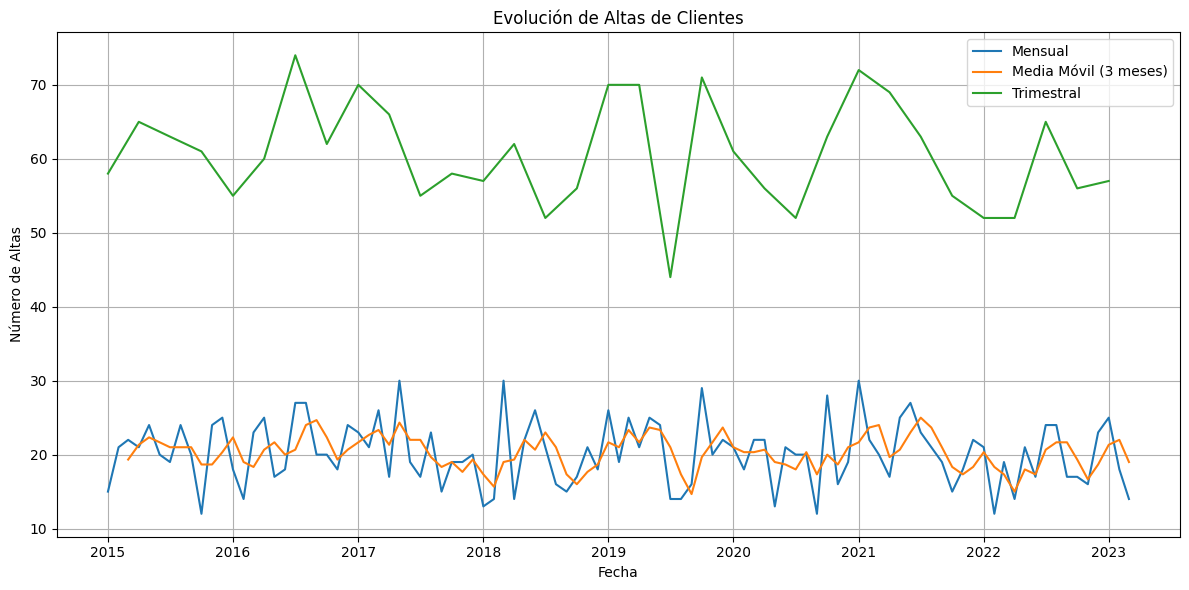

In [16]:
# Gráfico final combinando varias técnicas
plt.figure(figsize=(12, 6))
plt.plot(altas_por_mes.index.to_timestamp(), altas_por_mes, label='Mensual')
plt.plot(altas_media_movil.index.to_timestamp(), altas_media_movil, label='Media Móvil (3 meses)')
plt.plot(altas_trimestral.index.to_timestamp(), altas_trimestral, label='Trimestral')
plt.title('Evolución de Altas de Clientes')
plt.xlabel('Fecha')
plt.ylabel('Número de Altas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#!pip install seaborn

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
###import seaborn as sns

In [ ]:
# # Configuración para mejor visualización
# plt.style.use('seaborn-v0_8-whitegrid')  # Estilo de gráfico
# plt.rcParams.update({'font.size': 12})    # Tamaño de fuente
# plt.rcParams['figure.figsize'] = [10, 6]  # Tamaño predeterminado

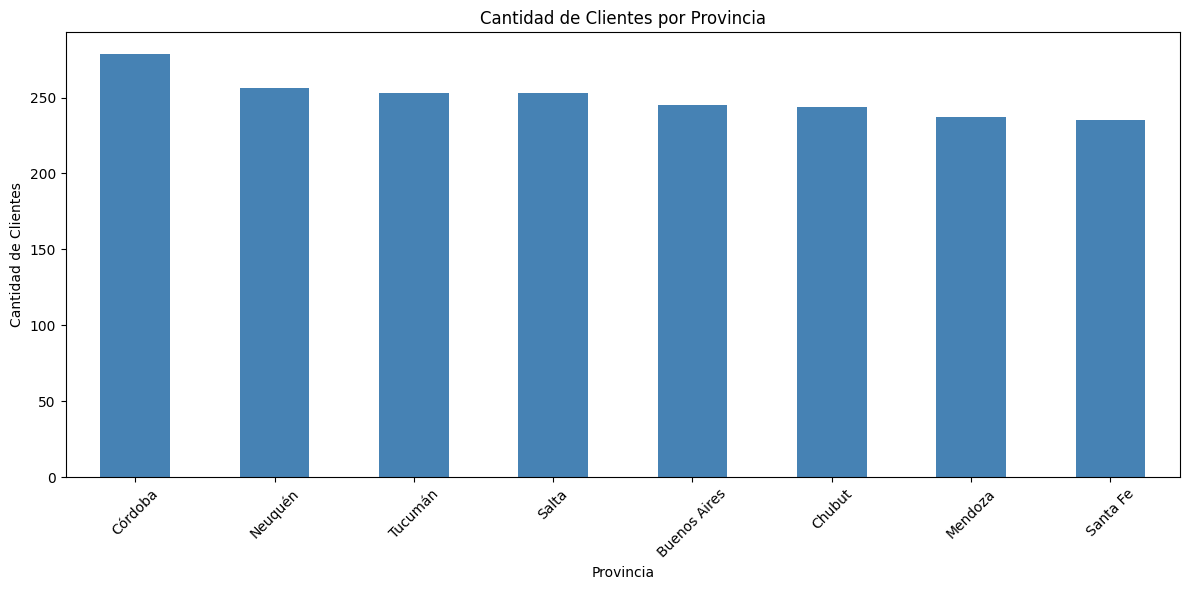

In [17]:
# 1. GRÁFICO DE BARRAS - Cantidad de clientes por provincia
plt.figure(figsize=(12, 6))
provincias_count = clientes['Provincia'].value_counts()
provincias_count.plot(kind='bar', color='steelblue')
plt.title('Cantidad de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

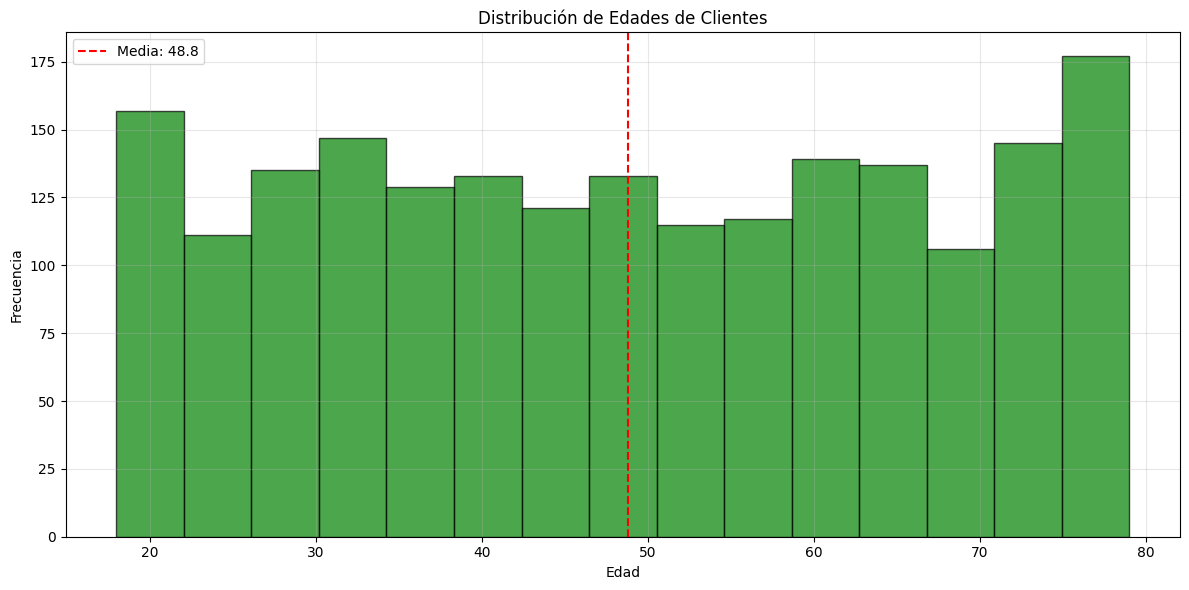

In [18]:
# 2. HISTOGRAMA - Distribución de edades
plt.figure(figsize=(12, 6))
plt.hist(clientes['Edad'], bins=15, alpha=0.7, color='green', edgecolor='black')
plt.axvline(clientes['Edad'].mean(), color='red', linestyle='--', label=f'Media: {clientes["Edad"].mean():.1f}')
plt.title('Distribución de Edades de Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

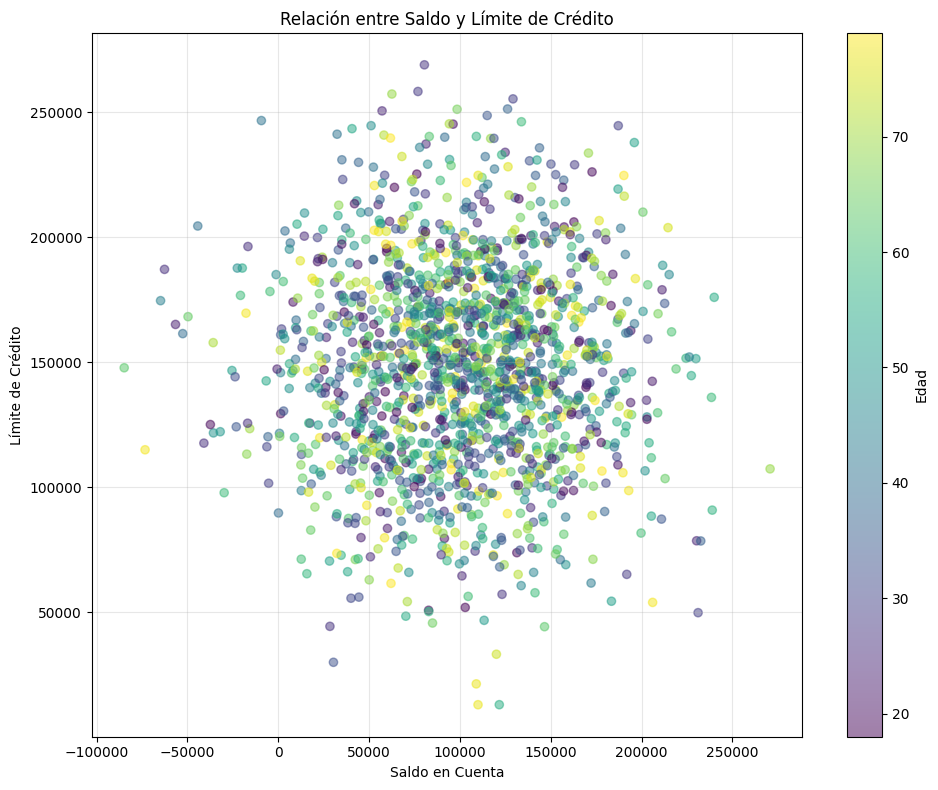

In [19]:
# 3. GRÁFICO DE DISPERSIÓN (SCATTER) - Relación entre Saldo y Límite de crédito
plt.figure(figsize=(10, 8))
plt.scatter(clientes['Saldo_cuenta'], clientes['Limite_credito'], 
            alpha=0.5, c=clientes['Edad'], cmap='viridis')
plt.colorbar(label='Edad')
plt.title('Relación entre Saldo y Límite de Crédito')
plt.xlabel('Saldo en Cuenta')
plt.ylabel('Límite de Crédito')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


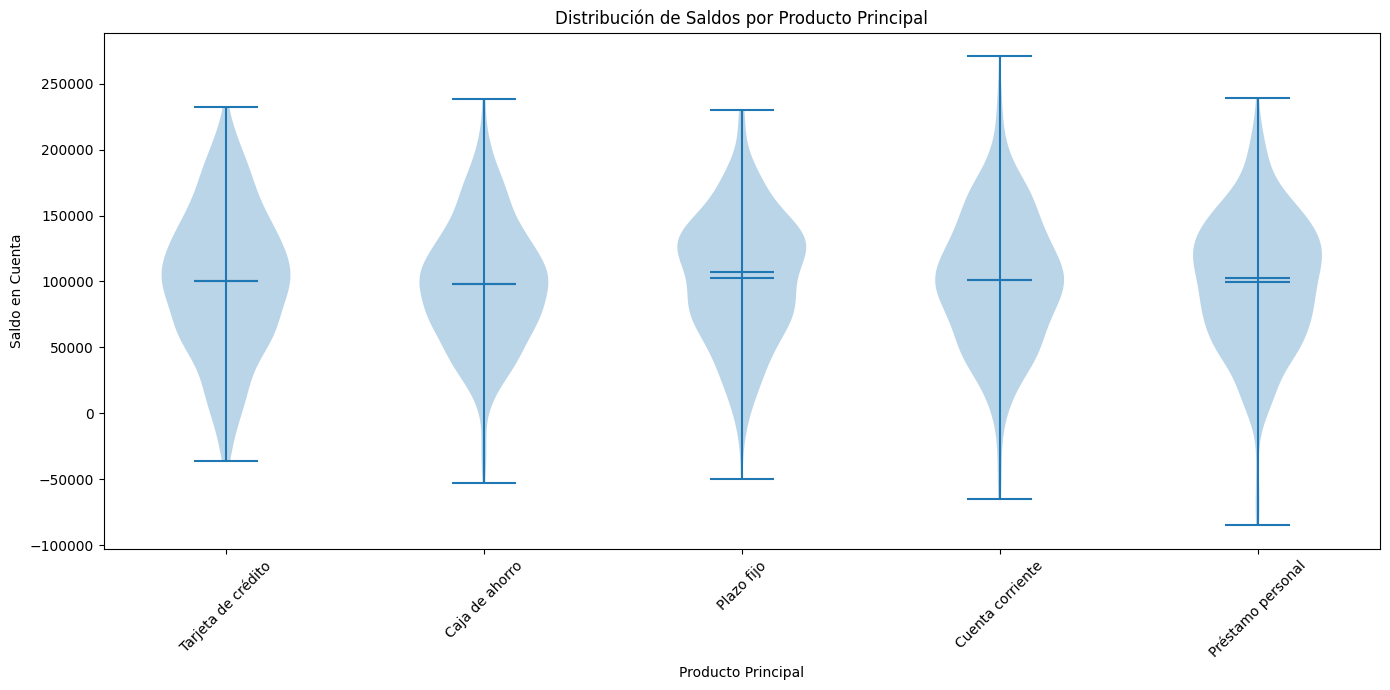

In [ ]:
#4 - VIOLIN PLOT
plt.figure(figsize=(14, 7))

# Obtener categorías únicas
productos = clientes['Producto_principal'].unique()

# Recopilar datos por producto
datos = [clientes[clientes['Producto_principal'] == p]['Saldo_cuenta'].dropna() for p in productos]

# Crear violin plot simple
plt.violinplot(datos, showmeans=True, showmedians=True)

# Configurar etiquetas del eje x
plt.xticks(range(1, len(productos)+1), productos, rotation=45)

# Títulos
plt.title('Distribución de Saldos por Producto Principal')
plt.xlabel('Producto Principal')
plt.ylabel('Saldo en Cuenta')

plt.tight_layout()
plt.show()

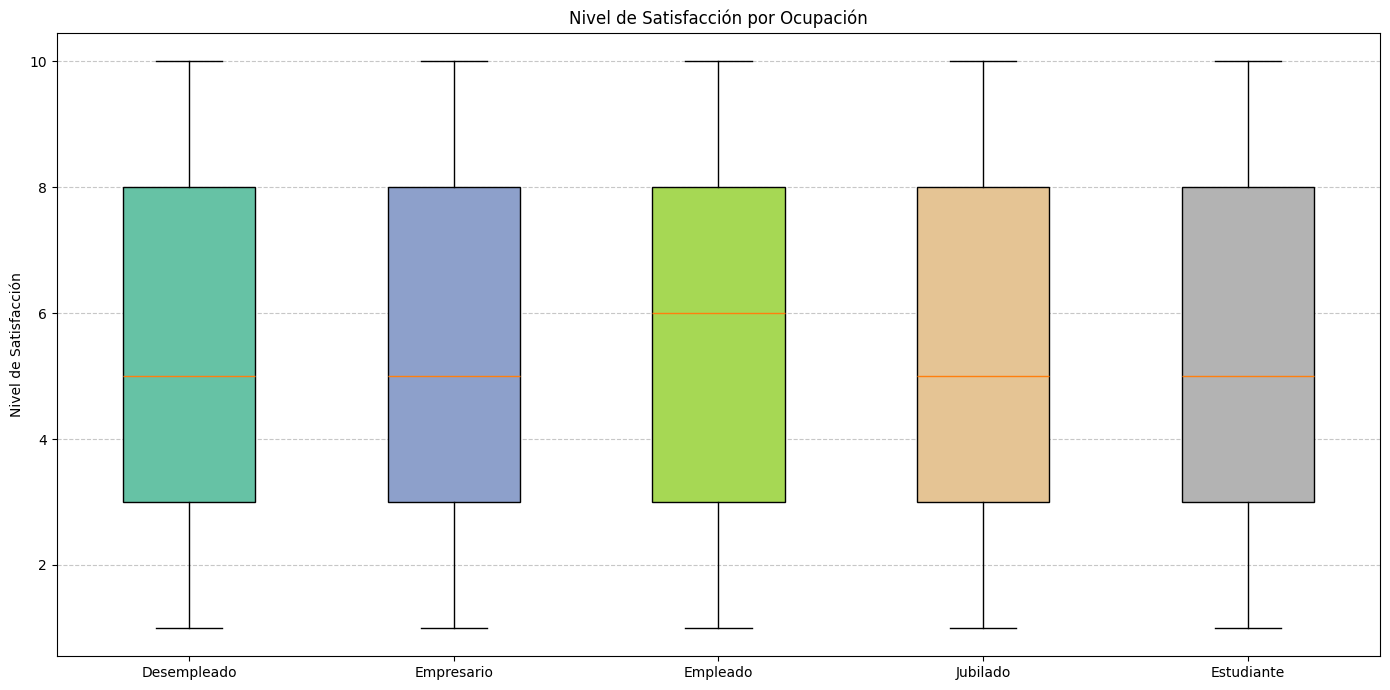

In [ ]:
## 5 - BOX PLOT
# Crear la figura
plt.figure(figsize=(14, 7))

# Filtrar el DataFrame para excluir registros con Ocupacion == "nan" o nulos
clientes_filtrados = clientes[clientes['Ocupacion'].notna() & (clientes['Ocupacion'] != '0')]

# Obtener las ocupaciones únicas 
ocupaciones = clientes_filtrados['Ocupacion'].unique()

# Recopilar datos por ocupación
datos = [clientes_filtrados[clientes_filtrados['Ocupacion'] == o]['Nivel_satisfaccion'].dropna() for o in ocupaciones]

# Crear una paleta de colores
colores = plt.cm.Set2(np.linspace(0, 1, len(ocupaciones)))

# Crear boxplot con colores
boxplot = plt.boxplot(datos, patch_artist=True)

# Añadir colores a los boxplots
for box, color in zip(boxplot['boxes'], colores):
    box.set(facecolor=color)
    box.set(edgecolor='black')  # Color del borde

# Añadir etiquetas del eje x
plt.xticks(range(1, len(ocupaciones)+1), ocupaciones, rotation=0)

# Añadir títulos
plt.title('Nivel de Satisfacción por Ocupación')
#plt.xlabel('Ocupación')
plt.ylabel('Nivel de Satisfacción')

# Agregar una cuadrícula horizontal para facilitar la lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

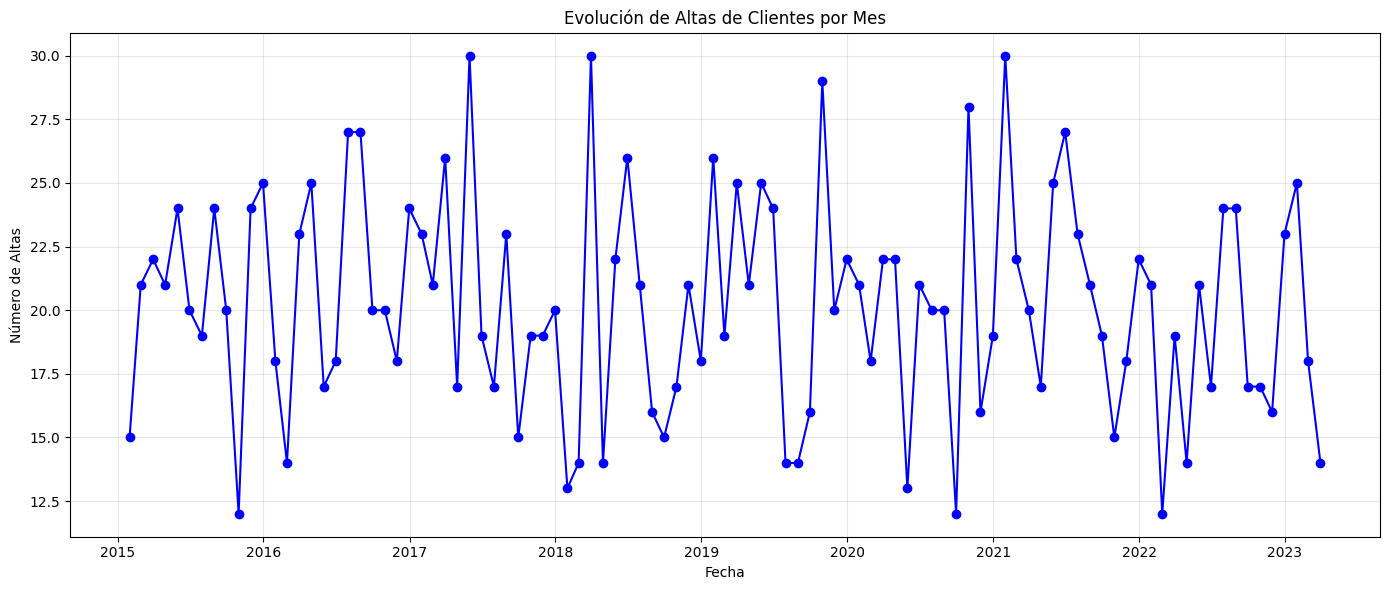

In [32]:
# 6. GRÁFICO DE LÍNEA - Evolución de altas por mes
clientes['Fecha_alta'] = pd.to_datetime(clientes['Fecha_alta'])
altas_por_mes = clientes.resample('ME', on='Fecha_alta').size()

plt.figure(figsize=(14, 6))
plt.plot(altas_por_mes.index, altas_por_mes, marker='o', linestyle='-', color='blue')
plt.title('Evolución de Altas de Clientes por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Altas')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


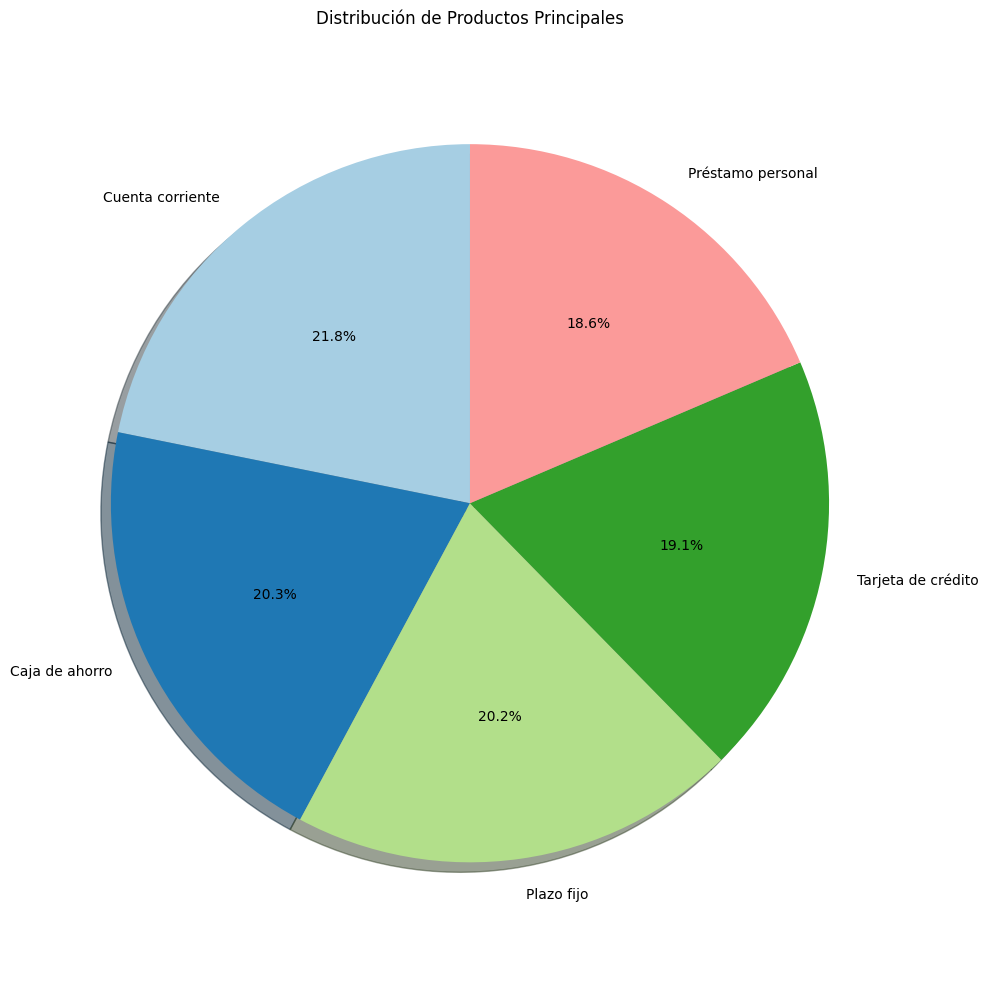

In [33]:
# 7. GRÁFICO CIRCULAR (PIE) - Distribución de productos principales
plt.figure(figsize=(10, 10))
productos_count = clientes['Producto_principal'].value_counts()
plt.pie(productos_count, labels=productos_count.index, autopct='%1.1f%%', 
        shadow=True, startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Productos Principales')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()


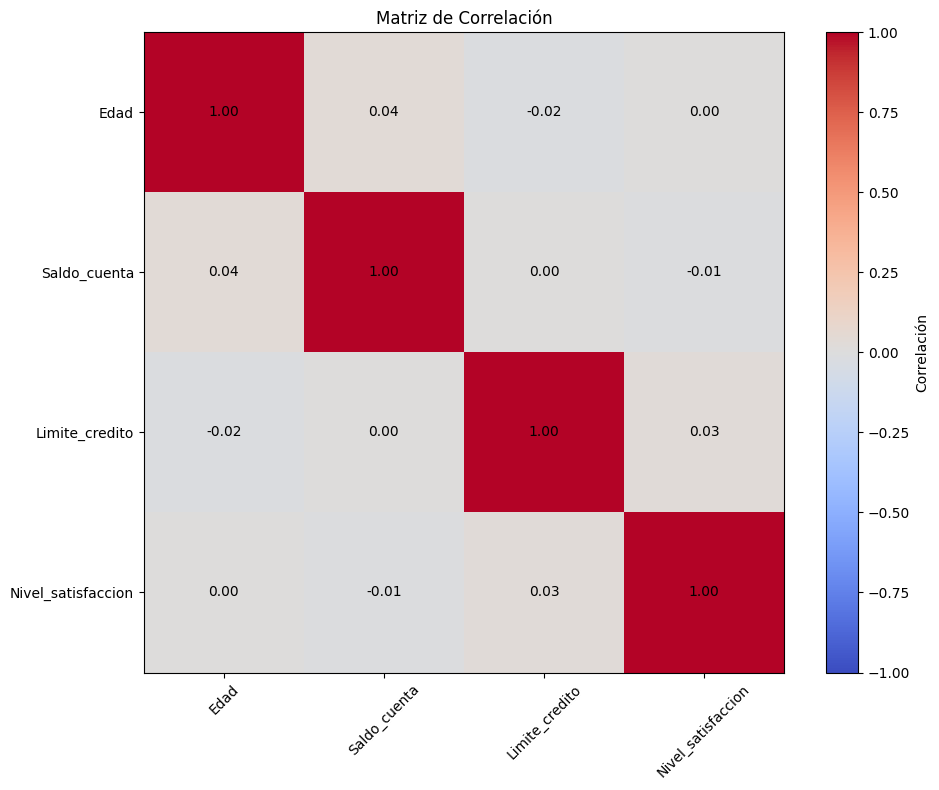

In [34]:
# 8. MAPA DE CALOR (HEATMAP) - Matriz de correlación
import matplotlib.pyplot as plt
import numpy as np

# Calcular la matriz de correlación
corr_matrix = clientes[['Edad', 'Saldo_cuenta', 'Limite_credito', 'Nivel_satisfaccion']].corr()

# Crear la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir barra de colores
plt.colorbar(label='Correlación')

# Añadir los valores como texto en cada celda
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center')

# Configurar ejes
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)

# Título
plt.title('Matriz de Correlación')

plt.tight_layout()
plt.show()